# Project Number -2(Projects Dynamics m20)

BaseBall Game Dataset 

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('baseball.csv')
data
# the dataset utilizes data from a major league baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in next year.
#the rediction is based on 16 different input features to the machine learning
### the output will be a value that represents the number of wins

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# EDA

In [3]:
df=pd.DataFrame(data=data)
df.shape

(30, 17)

In [4]:
df.columns
# Feature columns -> R=Runs, AB =at bats,H=hits,2B=doubles,3B=triples,HR=homeruns,SO=strikeouts, SB=stolen bases, RA=runs allowed,ER=earned runs, ERA=earned run average, SHO=shoutouts, SV=saves, E=errors
## Target column -> W=Number of oredicted wins

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.info()
#Tracking the overall information about the given dataset
## No Null values present
### its a complete numerical dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df1=df.copy()
# taking one copy of the dataset

In [7]:
df1.describe()
#most of the data are normally distributed since mean and median are close
#STD values are high indicating the date is quite spread out

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Univariate Analysis

In [8]:
c={'boxes':'Red','whiskers':'Blue','medians':'Green','caps':'Grey'}
# fixing the color for boxplot

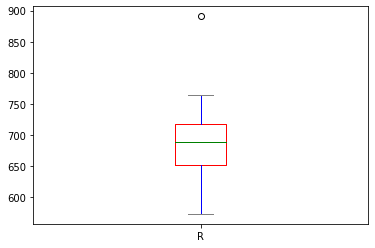

In [9]:
df1['R'].plot.box(color=c)
#no outliers present

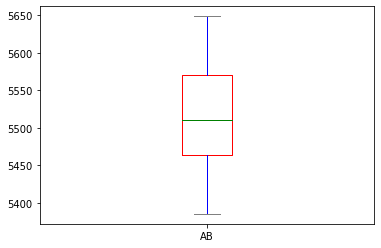

In [10]:
df1['AB'].plot.box(color=c)
#no outliers present

{'bodies': [<matplotlib.collections.PolyCollection at 0x201f0828b88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201f081bf48>,
 'cmins': <matplotlib.collections.LineCollection at 0x201f0837ac8>,
 'cbars': <matplotlib.collections.LineCollection at 0x201f0837ec8>}

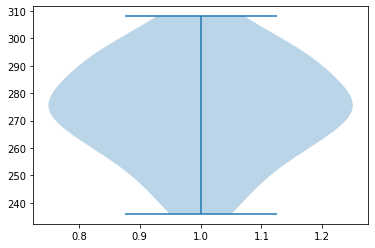

In [11]:
plt.violinplot(df1['2B'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x201f08af4c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201f0828848>,
 'cmins': <matplotlib.collections.LineCollection at 0x201f08b6508>,
 'cbars': <matplotlib.collections.LineCollection at 0x201f08b6a88>}

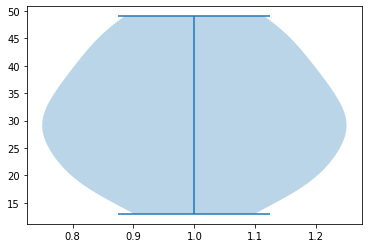

In [12]:
plt.violinplot(df1['3B'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x201f08a9248>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x201f08af208>,
 'cmins': <matplotlib.collections.LineCollection at 0x201f092a708>,
 'cbars': <matplotlib.collections.LineCollection at 0x201f092acc8>}

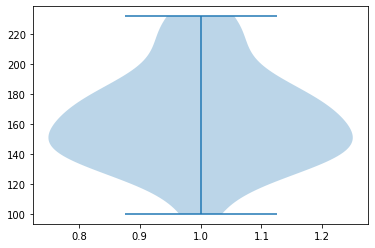

In [13]:
plt.violinplot(df1['HR'])

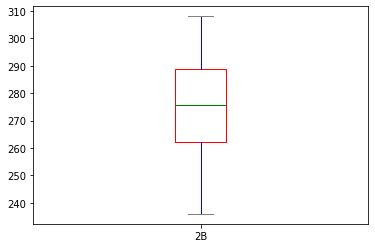

In [14]:
df1['2B'].plot.box(color=c)
#no outliers present

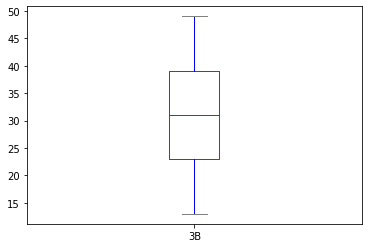

In [15]:
df1['3B'].plot.box(color=c)
#no outliers present

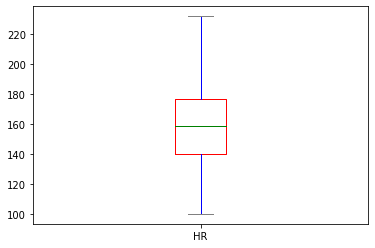

In [16]:
df1['HR'].plot.box(color=c)
#no outliers present

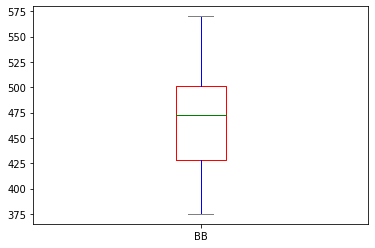

In [17]:
df1['BB'].plot.box(color=c)
#no outliers present

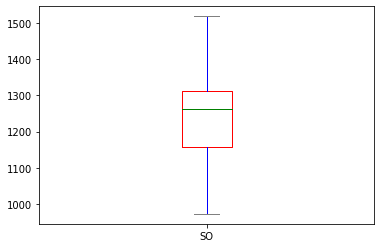

In [18]:
df1['SO'].plot.box(color=c)
#no outliers present

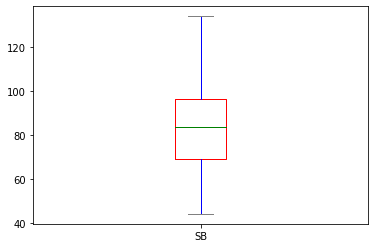

In [19]:
df1['SB'].plot.box(color=c)
#no outliers present

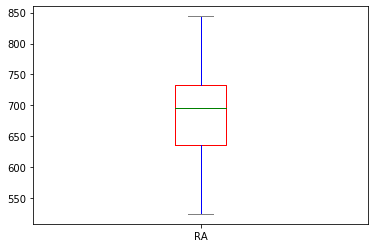

In [20]:
df1['RA'].plot.box(color=c)
#no outliers present

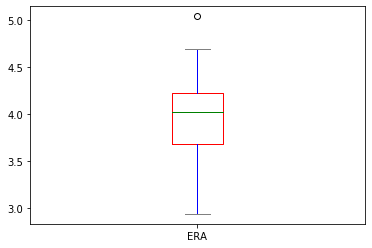

In [21]:
df1['ERA'].plot.box(color=c)
#seems some outliers are there 

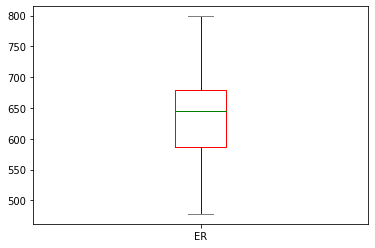

In [22]:
df1['ER'].plot.box(color=c)
#no outliers present

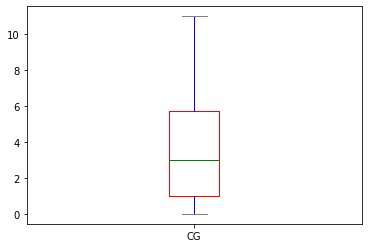

In [23]:
df1['CG'].plot.box(color=c)
#no outliers present

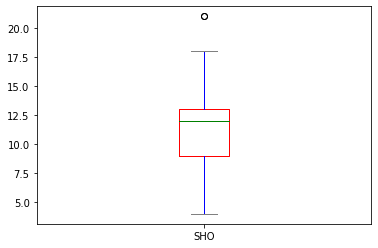

In [24]:
df1['SHO'].plot.box(color=c)

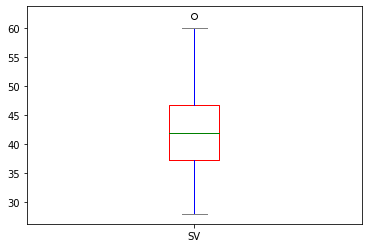

In [25]:
df1['SV'].plot.box(color=c)
#no outliers present

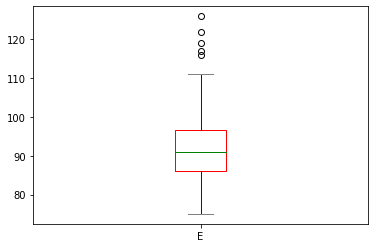

In [26]:
df1['E'].plot.box(color=c)
#outliers are there in this feature variable

# Bivariate Analysis

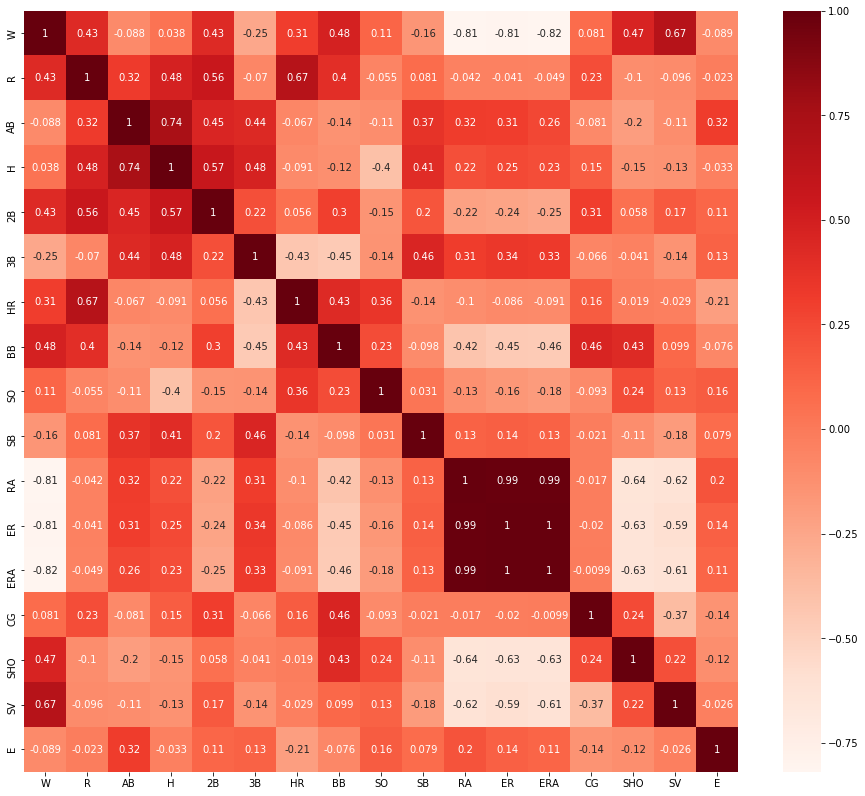

In [27]:
plt.figure(figsize=(16,14))
sns.heatmap(df1.corr(),cmap='Reds',annot=True)
# Checking co-relation between all the attributes.
# Three columns ER(earned runs),ERA(earned runs average),RA(runs allowed) are having negative realtion with target output.
# So if the team is able to keep these figures on lower side, chnaces winning is higher


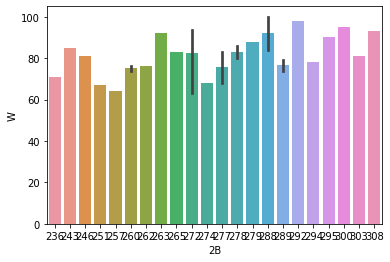

In [28]:
sns.barplot(x='2B',y='W',data=df1)
# number of doubles are distributed more or less equally among all games 

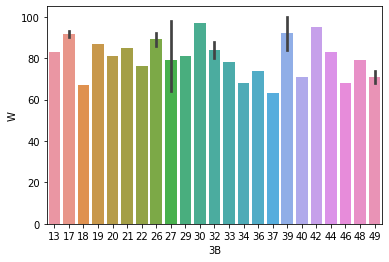

In [29]:
sns.barplot(x='3B',y='W',data=df1)
# number of triplets are distributed more or less equally among all games 

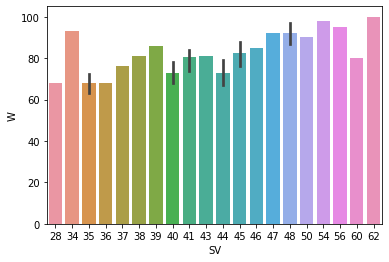

In [30]:
sns.barplot(x='SV',y='W',data=df1)
# number of saves are distributed more or less equally among all games 

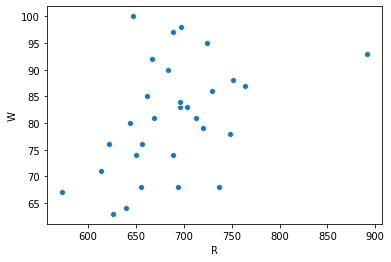

In [31]:
sns.scatterplot(data=df1,x='R',y='W')
# the column 'Runs' is carrying positive realtion with win. So more the runs, chnaces of winning is higher.

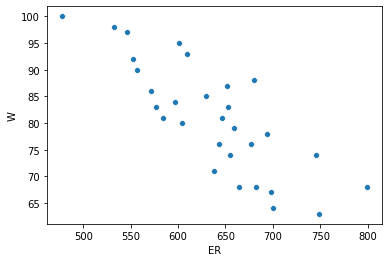

In [32]:
sns.scatterplot(data=df1,x='ER',y='W')
# the column 'Eearned runs' is carrying negative realtion with win. So less the ER, chnaces of winning is higher.

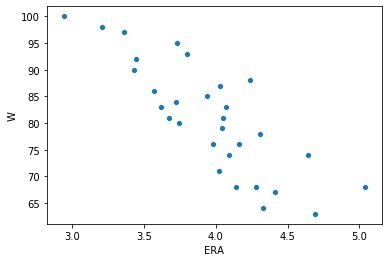

In [33]:
sns.scatterplot(data=df1,x='ERA',y='W')
# the column 'Eearned Runs Allowed' is carrying negative realtion with win. So less the ERA, chnaces of winning is higher.

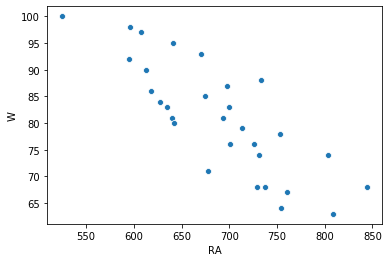

In [34]:
sns.scatterplot(data=df1,x='RA',y='W')
# the column 'Runs allowed' is carrying negative realtion with win. So less the RA, chnaces of winning is higher.

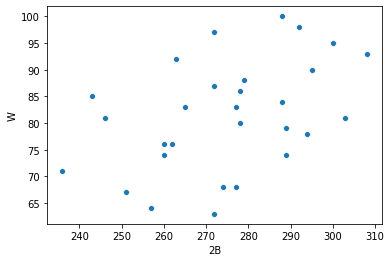

In [35]:
sns.scatterplot(data=df1,x='2B',y='W')
# the column 'doubles' is carrying positive realtion with win. So more the doubles, chnaces of winning is higher.

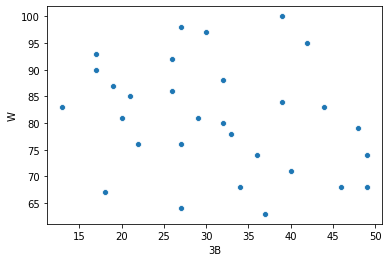

In [36]:
sns.scatterplot(data=df1,x='3B',y='W')
# the column 'triplets' is carrying negative realtion with win.we cant draw any conculsion with this information

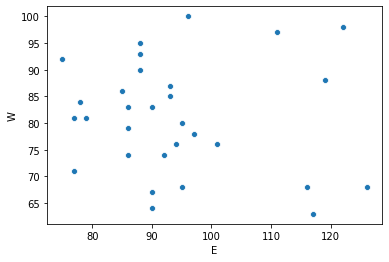

In [37]:
sns.scatterplot(data=df1,x='E',y='W')
# the column 'Error' is carrying negative realtion with win. So less the errors, chnaces of winning is higher.

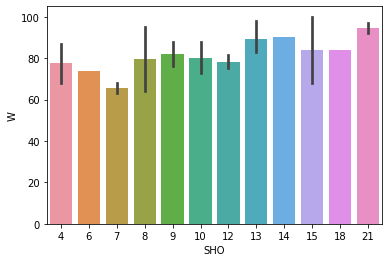

In [38]:
sns.barplot(x='SHO',y='W',data=df1)

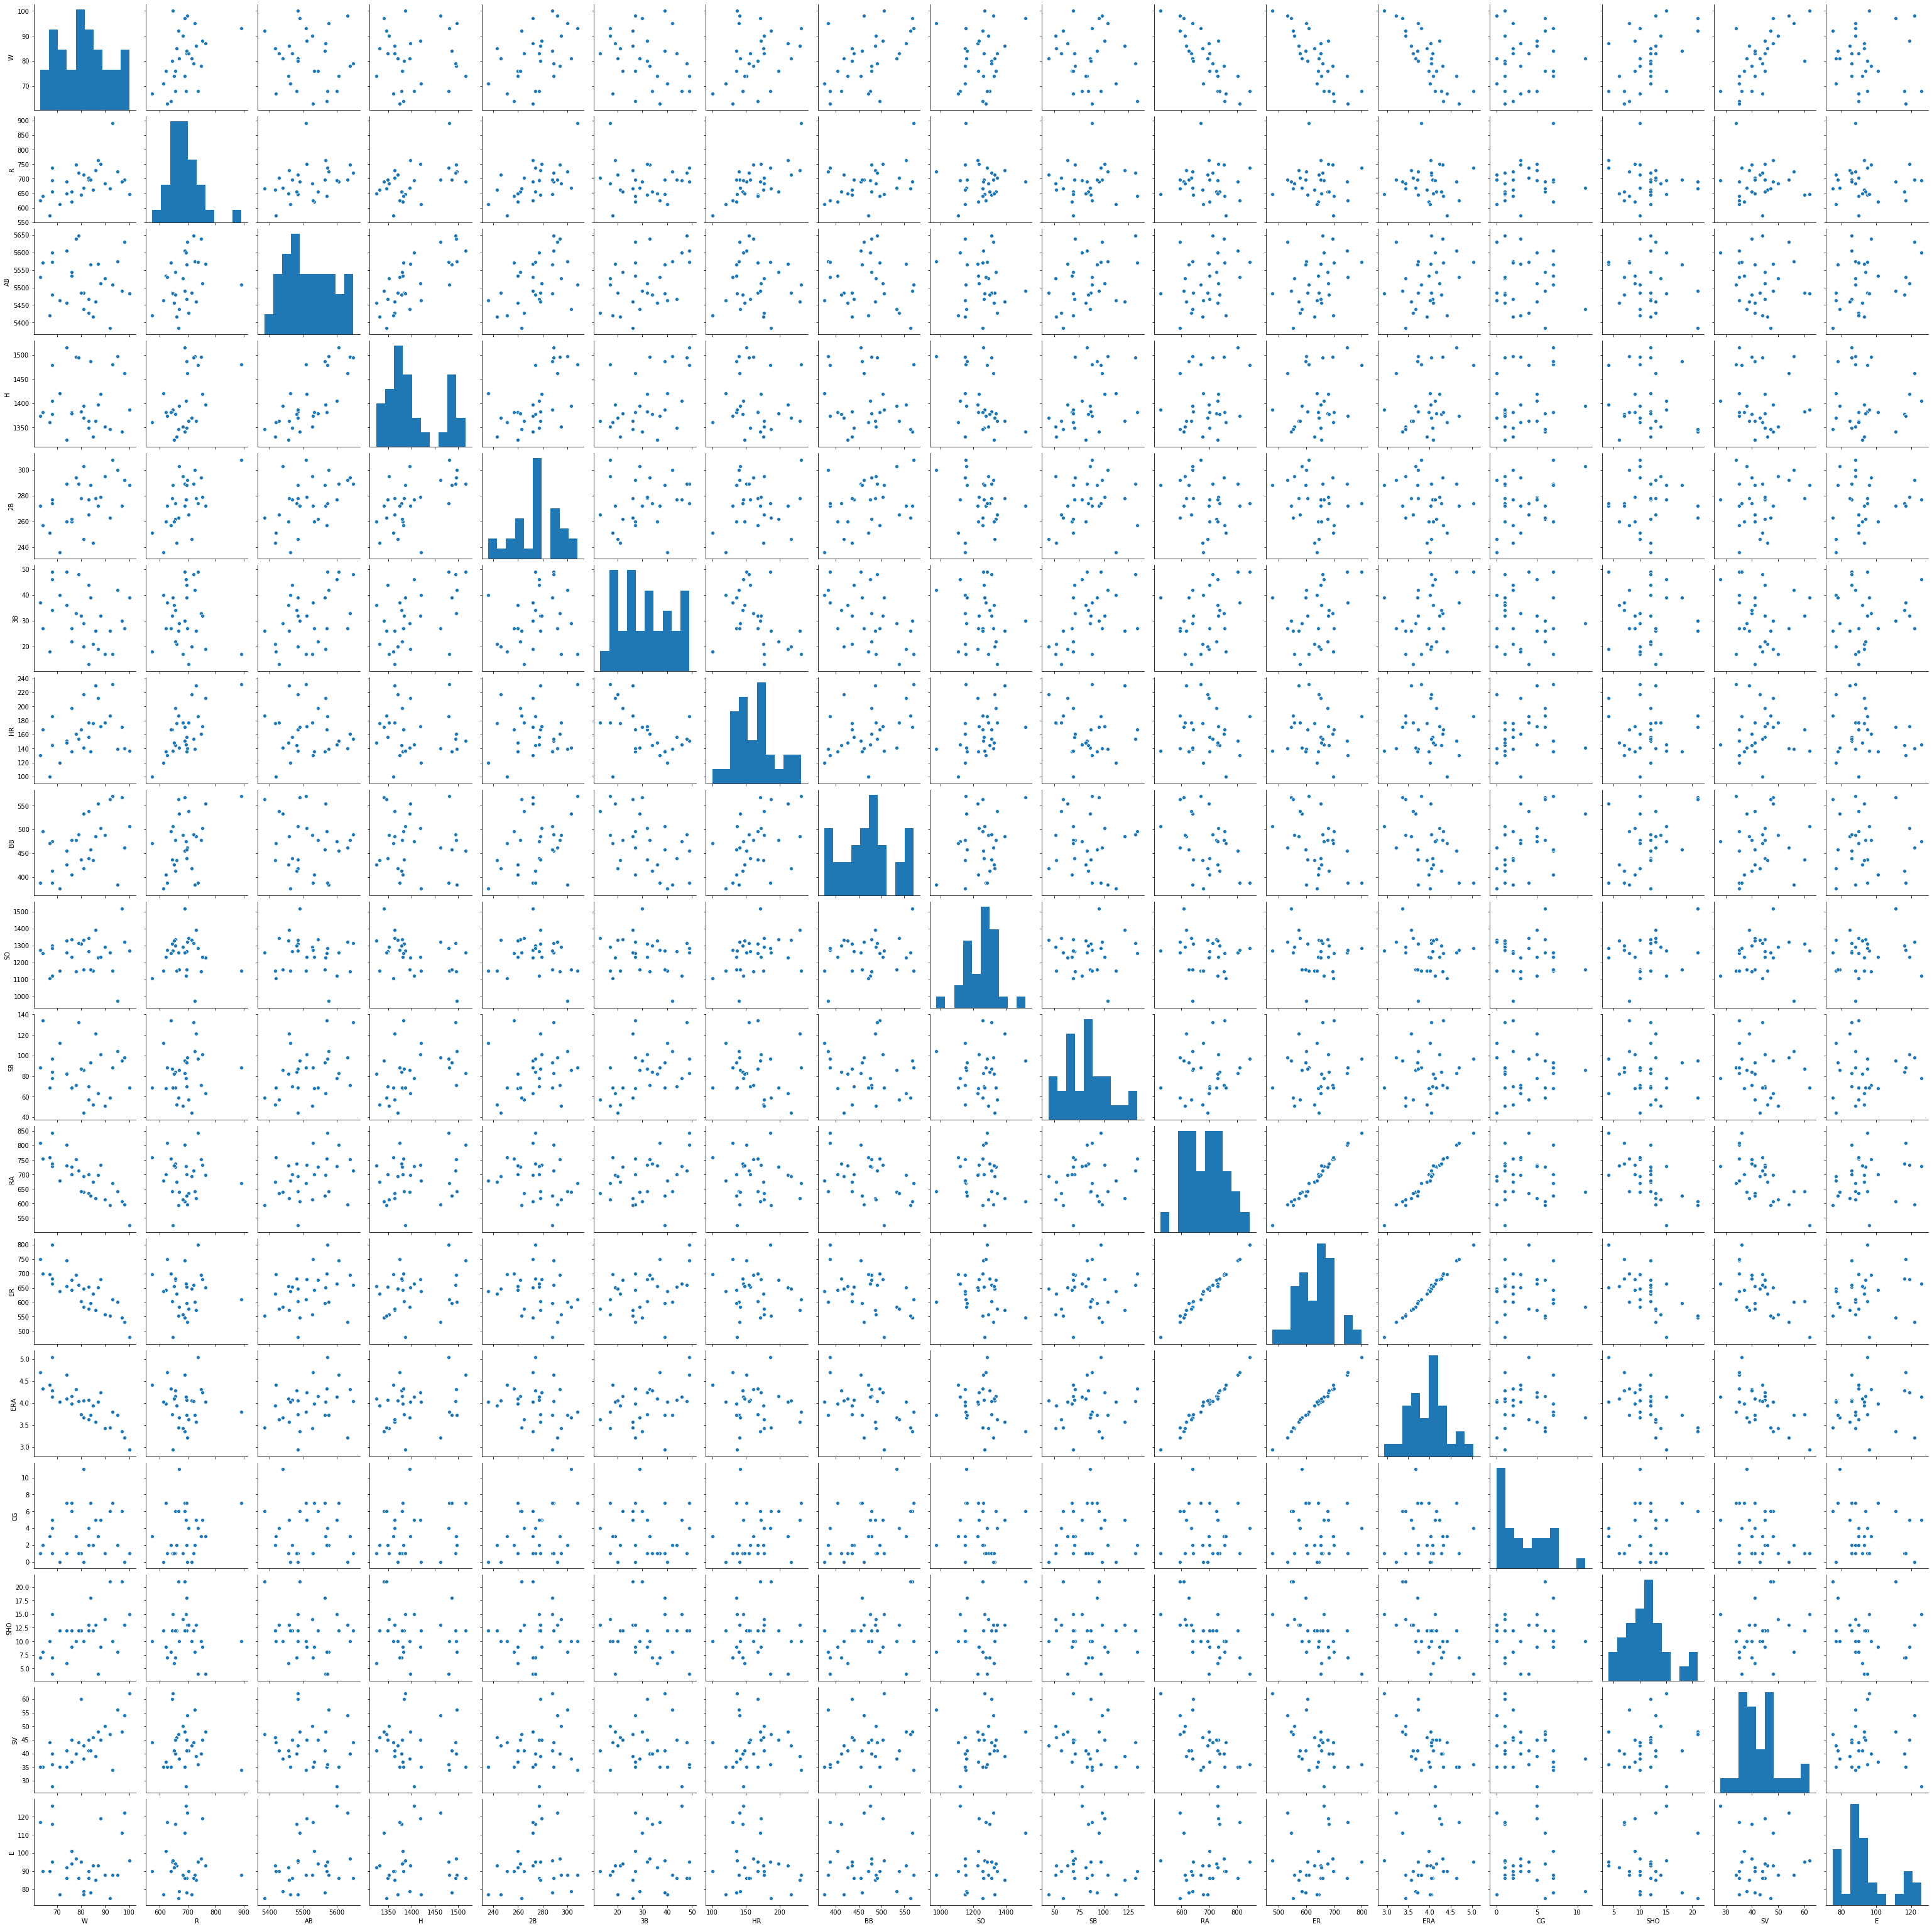

In [39]:
sns.pairplot(df1)
# pictorial representation of corelation among the attributes
# most of the columns are positively corealted with target atrribtes

# Cleaning the Dataset to remove outliers

In [40]:
z=np.abs(zscore(df1))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [41]:
print(np.where(z>3))
#only one row is carrying outliers

(array([5], dtype=int64), array([1], dtype=int64))


In [42]:
dfn=df1[(z<3).all(axis=1)]
dfn.shape
# so dfn is the new dataset and its ready for maodeltraining purpose

(29, 17)

In [43]:
dfn.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Data Preprocessing

In [44]:
x=dfn.iloc[:,1:]
x.head()
#feature input variable 

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [45]:
y=dfn.iloc[:,0]
y.head()
# target variable

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [46]:
# Optimising the seed value(random state)
# the output values are continous. so we have to comsider the regression algorithms here
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.9860605779320395
accuracy score correspondng to random state 42 is: 0.9701630157427428
accuracy score correspondng to random state 43 is: 0.9905710548132145
accuracy score correspondng to random state 44 is: 0.9844166504463546
accuracy score correspondng to random state 45 is: 0.9891329022934812
accuracy score correspondng to random state 46 is: 0.969001262157255
accuracy score correspondng to random state 47 is: 0.9981690591400798
accuracy score correspondng to random state 48 is: 0.9934910736301621
accuracy score correspondng to random state 49 is: 0.9832299552423746
accuracy score correspondng to random state 50 is: 0.97558060757736
accuracy score correspondng to random state 51 is: 0.9819586750389264
accuracy score correspondng to random state 52 is: 0.9912263038237641
accuracy score correspondng to random state 53 is: 0.9774874537632655
accuracy score correspondng to random state 54 is: 0.9828481635600985
accuracy score correspo

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.3)

In [48]:
lm.fit(x_train,y_train)
## fitting the training part with algorithm. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
print('score:',lm.score(x_train,y_train))
# we achieve the score of 0.99 which implies model has learnt almost closed to 99% perfection.

score: 0.9988654053577636


In [50]:
print('error:')   ## calculating the error
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 21.675385993871423
mean squared error: 595.9805666582247
root mean squared error: 24.412713217875325


In [51]:
lm.coef_

array([ 7.95429640e-02,  7.92073446e-02, -2.68187793e-02, -1.31420392e-01,
        2.49252998e-01,  1.62960270e-01, -2.93372128e-03, -5.62590028e-02,
       -4.55321064e-02,  5.05739123e-01, -1.16573065e+00,  8.81837256e+01,
        7.08518175e-01,  1.06803766e+00,  5.03723481e-01,  2.00235333e-01])

In [52]:
pred

array([ 58.75025926,  52.07660225,  88.3977632 ,  78.32975311,
        93.90463083, 104.04968787, 102.86268278,  90.56880269,
       101.4515212 ])

In [60]:
# trying to checking overfitting/underfitting of the model and chosing the hyperparameter
ls=Lasso()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.2853046996768397
{'alpha': 0.1}


In [69]:
ls=Lasso(alpha=0.1)

In [70]:
ls.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
ls.score(x_train,y_train)

0.9954323094100587

In [72]:
# checking with SVR as well if higher score can be achieved
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
scoresvr=svr.score(x_train,y_train)
predsvr=svr.predict(x_test)

In [73]:
print(scoresvr)

0.6904832579466147


In [74]:
# boosting the model 
rf=RandomForestRegressor(n_estimators=200,random_state=50)

In [75]:
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))
# used ensemble technique to achieve better score

0.9508454322166882


# Concluding remarks & observation

In [76]:
# Linear Regression gives us the score of 0.9988
# Lasso Regression gives us the score of 0.9954
# RandomForest gives us the score of 0.9554
# SVR gives us the score of 0.690

In [ ]:
# So lets save the Linear regression algorithm for this model

# Saving the model 

In [ ]:
joblib.dump(lm,'lmbaseball.obj')
## We settle this dataset with Linear Regression model since the score is higher. we saved the model as well. 